In [2]:
#| hide
import sys
sys.path.append('../.venv/lib/python3.9/site-packages/')
sys.path

['/afs/crc.nd.edu/group/TAI/Users/painswor/Explain2Me-Framework-Example/nbs',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/afs/crc.nd.edu/user/p/painswor/.local/lib/python3.9/site-packages',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/afs/crc.nd.edu/user/p/painswor/.ipython',
 '../.venv/lib/python3.9/site-packages/']

# Salience Entropy

One of the most straightforward ways of statistically summarizing the model's salience is to study the entropy of generated salience maps. In terms of explainable-AI, well trained models typically have focused salience on the object it is classifying.  High accuracy scores with unfocused salience maps may be indicators that the model has overfit the traiining data. 

In [1]:
#| hide
import os
import glob
import skimage.io
import skimage.filters
import matplotlib.image as mpimg
import skimage
import skimage.measure
import glob
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

## Measuring Entropy

In [4]:
img_name = "00001.png"
img_path = f'../output/cams/{img_name}'

### Calculate Entropy

Read in the image

In [5]:
cam = mpimg.imread(img_path)

Calculate entropy

In [6]:
entropy = skimage.measure.shannon_entropy(cam)

### Normalize Entropy

The normalization factor Sˆpmax(m,n) plays a key role in getting accurate estimates of the entropy in case of low- and varying-resolution and quantized data (such as Grad-CAMs) and requires a commentary.

In [7]:
normalized_entropy = round(entropy / 5.614, 3)
print(normalized_entropy)

1.296


### Display Image

/tmp/ipykernel_2076415/2158396087.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=None)


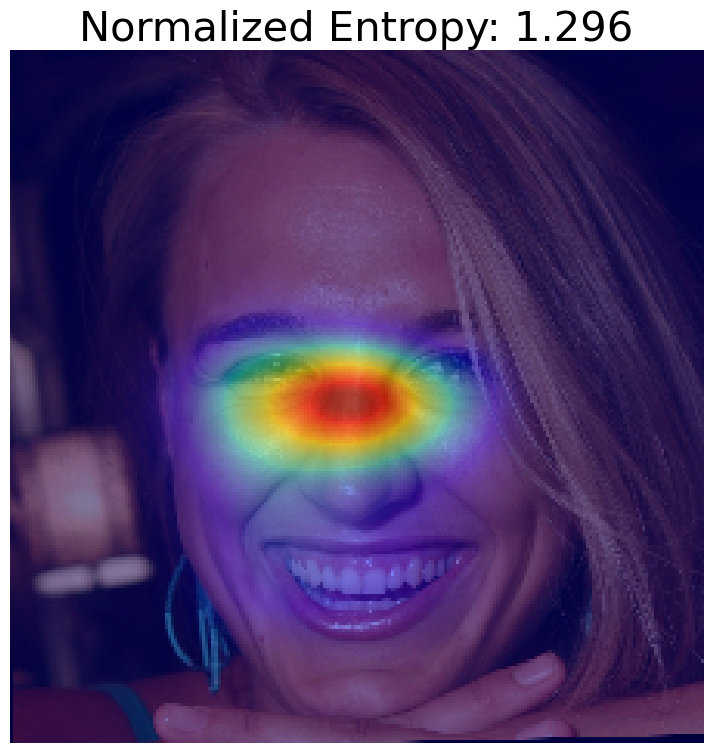

In [8]:
fig = plt.figure(figsize=(10., 8.), facecolor='white')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for index, (ax, im) in enumerate(zip(grid, [cam])):
    # Iterating over the grid returns the Axes.
    ax.axis('off')
    ax.grid(b=None)
    ax.imshow(im)
    ax.set_title("Normalized Entropy: " + str(normalized_entropy), fontsize=30)
fig.set_size_inches(18, 9)
plt.show()